---
---
**Papagoudis Georgios**

- **Data Preperation(Cleaning,Transformation,Feature Engineering,TrainTest Split), Evaluation, Optimization**
- **Regression: Evaluation Metrics and Algorithms(Linear, NonLinear, Lasso/Ridge, KNN)**
- **Classification: Evaluation Metrics and Algorithms(Logistic, kNN, SVM, DecisionTrees, RandomForests, NaiveBayes), Cross Validation, Stratification**
- **Clustering: kMeans/Hierarchical, Association, Evaluation Metrics**

Advanced Computational Methods

Technical University of Munich

Hochschule für Politik München

Computational Social Science


---
---

## Dataset Description

We will use data from the VDEM project and from Freedom House's "Freedom on the Net" dataset, which is an annual report on the online freedoms, or lack thereof, present in countries over the world.

The data contains two files:
- `VDEM_subset`: small number of countries, all variables
- `VDEM`: more countries, but two variables are missing: `Total Score`, and `Status`.

Below is a table summarizing the variables and the files:

| Variable | Description | Type |VDEM | VDEM_subset |
| ---    |    :--         | :-- | :--:  |         :--: |
|`country_name`| Country name | General|   Yes      |  Yes  |
|`year`| year  | General    | Yes |  Yes  |
|`Total Score`| a continuous numerical measure of a nation's internet freedoms.| General  |   No      |  Yes  |
|`Status`| a categorical variable which indicates the status of a nation's internet freedoms. <br>It has three levels: `'Free'`, `'Partly Free'`, and `'Not Free'`.| General  |   No      |  Yes  |
|`v2x_polyarchy`| Electoral democracy index. | High level democracy |   Yes      |  Yes  |
|`v2x_libdem`| Liberal democracy index. | High level democracy |   Yes      |  Yes  |
|`v2x_partipdem`| Participatory democracy index.| High level democracy  |   Yes      |  Yes  |
|`v2x_delibdem`| Deliberative democracy index. | High level democracy  |   Yes      |  Yes  |
|`v2x_egaldem`| Egalitarian democracy index. | High level democracy |   Yes      |  Yes  |
|`v2smgovdom_osp`| Government dissemnation of false information domestic. | Internet Freedom | Yes      |  Yes  |
|`v2smgovfilprc_osp`| Government internet filtering in practice | Internet Freedom | Yes      |  Yes  |
|`v2smgovsmcenprc_osp`| Government social media censorship in practice | Internet Freedom | Yes      |  Yes  |
|`v2smonper_osp`| Diversity of online media perspectives <br>(0=government only, 4=any perspective) | Internet Freedom  | Yes      |  Yes  |
|`v2smarrest_osp`| Arrests for political content dissemenated online.| Internet Freedom  | Yes      |  Yes  |
|`v2x_regime`| Regimes of the world – the RoW measure <br>`0`: Closed autocracy, `1`: Electoral autocracy, <br>`2`: Electoral democracy, and `3`: Liberal democracy.| Other  | Yes      |  Yes  |
|`e_regionpol`| Region (politico-geographic) | Other  | Yes      |  Yes  |




# Part 1. Exploration (25 points)

**1.1.** First, let's explore the `VDEM_subset` data. We are interested in the following:

1. How many countries are there per each type of regime?

In [ ]:
import numpy as np
import pandas as pd
VDEM_subset = pd.read_csv('VDEM_subset.csv')
VDEM_subset

,Total Score,Status,country_name,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_regime,v2smgovdom_osp,v2smgovfilprc_osp,v2smgovsmcenprc_osp,v2smonper_osp,v2smarrest_osp,e_regionpol
0,64,Partly Free,Angola,2019,0.386,0.230,0.105,0.260,0.148,1.0,2.441,2.969,3.924,2.883,1.995,4
1,72,Free,Argentina,2019,0.812,0.631,0.527,0.635,0.592,2.0,3.340,3.847,3.930,3.321,2.605,2
2,76,Free,Armenia,2019,0.805,0.641,0.532,0.706,0.656,1.0,2.926,3.714,3.915,3.293,2.493,1
3,77,Free,Australia,2019,0.838,0.789,0.602,0.737,0.706,3.0,2.878,3.829,3.876,3.300,2.684,5
4,39,Not Free,Azerbaijan,2019,0.206,0.070,0.072,0.047,0.118,1.0,0.384,1.231,2.672,1.558,0.777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,26,Not Free,Uzbekistan,2019,0.209,0.088,0.064,0.190,0.147,0.0,1.097,1.566,2.114,1.924,1.019,1
61,30,Not Free,Venezuela,2019,0.229,0.086,0.152,0.052,0.134,1.0,0.233,1.060,2.845,1.690,1.300,2
62,24,Not Free,Vietnam,2019,0.217,0.122,0.194,0.162,0.202,0.0,1.412,1.347,2.206,1.437,0.519,7
63,58,Partly Free,Zambia,2019,0.372,0.274,0.248,0.253,0.244,1.0,2.242,2.053,3.543,3.297,0.851,4


In [ ]:
Countries_per_regime = VDEM_subset['v2x_regime'].value_counts().reset_index().sort_values(by='v2x_regime')
Countries_per_regime.columns = ['v2x_regime', 'Number of Countries']
Countries_per_regime['regime'] = ['Closed autocracy', 'Electoral autocracy', 'Electoral democracy', 'Liberal democracy']
Countries_per_regime.set_index('regime', inplace=True)
Countries_per_regime

,v2x_regime,Number of Countries
regime,,
Closed autocracy,0.0,13
Electoral autocracy,1.0,29
Electoral democracy,2.0,12
Liberal democracy,3.0,11


2. For each politico-geographic region, which country has the least internet freedom? If there are ties, show one country randomly.

In [ ]:
a = VDEM_subset.groupby('e_regionpol').min().sort_values(by='e_regionpol').reset_index()
a= a[['e_regionpol', 'country_name','Total Score']]
a.columns = ['Region', 'Country with MIN Internet freedom', 'Total Score']
a.set_index('Region', inplace=True)
a


,Country with MIN Internet freedom,Total Score
Region,,
1,Armenia,26
2,Argentina,22
3,Bahrain,15
4,Angola,25
5,Australia,75
6,China,10
7,Cambodia,24
8,Bangladesh,26


3. Are the status of internet freedom and the regime of the country independent? Support your answer using statistical analysis.

In [ ]:
regime_status_cont_tbl = pd.crosstab(VDEM_subset['v2x_regime'], VDEM_subset['Status']).reindex(columns=['Free', 'Partly Free', 'Not Free'])
regime_status_cont_tbl

Status,Free,Partly Free,Not Free
v2x_regime,,,
0.0,0,3,10
1.0,2,16,11
2.0,4,8,0
3.0,9,2,0


In [ ]:
import scipy.stats as stats
stats.chi2_contingency(regime_status_cont_tbl)

Chi2ContingencyResult(statistic=44.11547100013212, pvalue=7.01239866603213e-08, dof=6, expected_freq=array([[ 3.        ,  5.8       ,  4.2       ],
       [ 6.69230769, 12.93846154,  9.36923077],
       [ 2.76923077,  5.35384615,  3.87692308],
       [ 2.53846154,  4.90769231,  3.55384615]]))

In [ ]:
expected_regime_status_cont_tbl = pd.DataFrame(stats.chi2_contingency(regime_status_cont_tbl)[3], columns=['Free', 'Partly Free', 'Not Free'], index=[0.0, 1.0, 2.0, 3.0])
expected_regime_status_cont_tbl

,Free,Partly Free,Not Free
0.0,3.000000,5.800000,4.200000
1.0,6.692308,12.938462,9.369231
2.0,2.769231,5.353846,3.876923
3.0,2.538462,4.907692,3.553846


In [ ]:
expected_regime_status_cont_tbl > regime_status_cont_tbl

,Free,Partly Free,Not Free
0.0,True,True,False
1.0,True,False,False
2.0,False,False,True
3.0,False,True,True


In [ ]:
# H0: Categories 'v2x_regime' and 'Status' are independent
# We observe that the 'expected contigency table'(under the H0 hypothesis) is way different than the observed one.
# In particular, as p-value = 7.01239866603213e-08 << 1,
# we reject the H0 in any practical level of significance, Thus, we conclude:
# The categorical variables 'v2x_regime' and 'Status' are dependent.
#In particular,
# The more democratic the regime the closer to Free is its status of Internet freedom

4. With an appropriate visualization, show the relationship between `Status` and each high level democracy variable.

In [ ]:
VDEM_subset[['Status','v2x_polyarchy',
       'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']]

,Status,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem
0,Partly Free,0.386,0.230,0.105,0.260,0.148
1,Free,0.812,0.631,0.527,0.635,0.592
2,Free,0.805,0.641,0.532,0.706,0.656
3,Free,0.838,0.789,0.602,0.737,0.706
4,Not Free,0.206,0.070,0.072,0.047,0.118
...,...,...,...,...,...,...
60,Not Free,0.209,0.088,0.064,0.190,0.147
61,Not Free,0.229,0.086,0.152,0.052,0.134
62,Not Free,0.217,0.122,0.194,0.162,0.202
63,Partly Free,0.372,0.274,0.248,0.253,0.244


([<matplotlib.axis.XTick at 0x7b5ee44c49d0>,
 [Text(1, 0, 'Not Free'), Text(2, 0, 'Partly Free'), Text(3, 0, 'Free')])

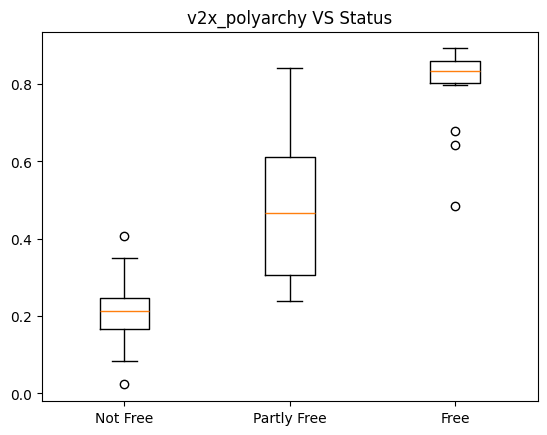

In [ ]:
import matplotlib.pyplot as plt

specs = ['Not Free' , 'Partly Free', 'Free']
data = []
for spec in specs:
    vals = VDEM_subset[VDEM_subset['Status'] == spec]['v2x_polyarchy']
    data.append(vals)
plt.boxplot(data)
plt.title('v2x_polyarchy VS Status')
plt.xticks([1,2,3],labels=specs)

([<matplotlib.axis.XTick at 0x7b5ee419e010>,
 [Text(1, 0, 'Not Free'), Text(2, 0, 'Partly Free'), Text(3, 0, 'Free')])

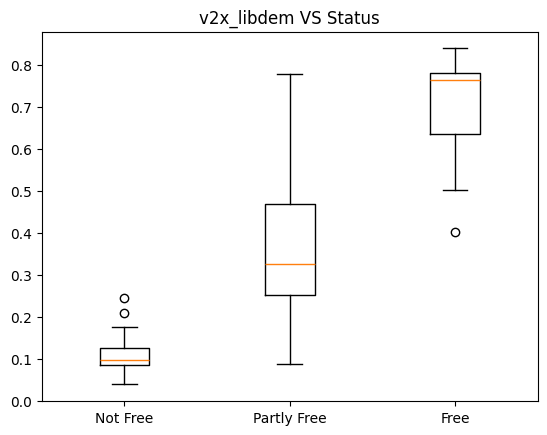

In [ ]:
data = []
for spec in specs:
    vals = VDEM_subset[VDEM_subset['Status'] == spec]['v2x_libdem']
    data.append(vals)
plt.boxplot(data)
plt.title('v2x_libdem VS Status')
plt.xticks([1,2,3],labels=specs)

([<matplotlib.axis.XTick at 0x7b5ee20849d0>,
 [Text(1, 0, 'Not Free'), Text(2, 0, 'Partly Free'), Text(3, 0, 'Free')])

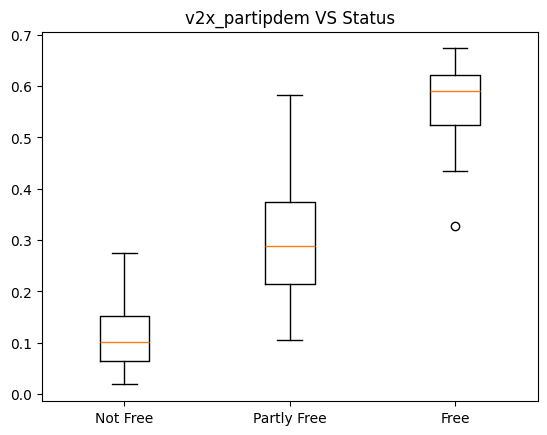

In [ ]:
data = []
for spec in specs:
    vals = VDEM_subset[VDEM_subset['Status'] == spec]['v2x_partipdem']
    data.append(vals)
plt.boxplot(data)
plt.title('v2x_partipdem VS Status')
plt.xticks([1,2,3],labels=specs)

([<matplotlib.axis.XTick at 0x7b5ee2145850>,
 [Text(1, 0, 'Not Free'), Text(2, 0, 'Partly Free'), Text(3, 0, 'Free')])

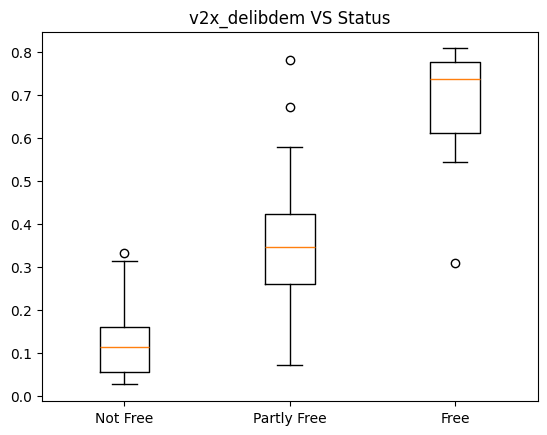

In [ ]:
data = []
for spec in specs:
    vals = VDEM_subset[VDEM_subset['Status'] == spec]['v2x_delibdem']
    data.append(vals)
plt.boxplot(data)
plt.title('v2x_delibdem VS Status')
plt.xticks([1,2,3],labels=specs)

([<matplotlib.axis.XTick at 0x7b5ee1fdae10>,
 [Text(1, 0, 'Not Free'), Text(2, 0, 'Partly Free'), Text(3, 0, 'Free')])

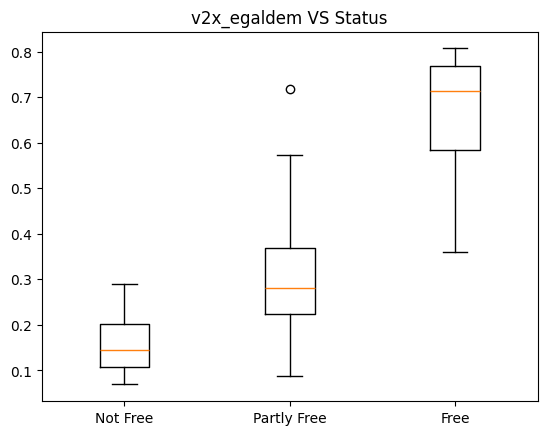

In [ ]:
data = []
for spec in specs:
    vals = VDEM_subset[VDEM_subset['Status'] == spec]['v2x_egaldem']
    data.append(vals)
plt.boxplot(data)
plt.title('v2x_egaldem VS Status')
plt.xticks([1,2,3],labels=specs)

In [ ]:
# From the respective boxplot of each high level democracy variable grouped by the Internet Freedom Status we observe:
# an 'upwards going pattern' and thus a positive coorelation between the high level democracy variable and the Status
# In particular the median value of each variable increases as the Freedom Status 'increases' (from 'Not Free'--> 'Partly Free' --> 'Free')
# Countries with 'more free' Status are expected to have greater value of 'high level democracy variables'
# Countries with greater value of 'high level democracy variables'  are expected to have 'more free' Status.

**1.2.** Last, but not least, using `VDEM` dataset, create a subset containing countries that are not present in `VDEM_subset`, and reorder the variables based on the partial data. Save the dataframe into a variable called `holdout`. How many countries are in this dataframe?

In [ ]:
VDEM = pd.read_csv('VDEM.csv')
VDEM

,country_name,year,e_regionpol,v2x_regime,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2smgovdom_osp,v2smgovfilprc_osp,v2smgovsmcenprc_osp,v2smonper_osp,v2smarrest_osp
0,Mexico,2019,2,2.0,0.710,0.486,0.414,0.469,0.422,2.118,3.829,3.760,3.590,2.873
1,Suriname,2019,10,2.0,0.736,0.550,0.409,0.598,0.527,2.888,3.476,3.552,2.618,1.953
2,Sweden,2019,5,3.0,0.874,0.829,0.618,0.791,0.776,3.779,3.903,3.955,3.465,2.789
3,Switzerland,2019,5,3.0,0.873,0.827,0.776,0.831,0.803,3.792,3.885,3.926,3.304,2.795
4,Ghana,2019,4,3.0,0.718,0.608,0.338,0.619,0.529,3.580,3.446,3.713,3.288,2.301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Solomon Islands,2019,9,2.0,0.670,0.511,0.412,0.391,0.424,3.046,3.813,3.743,3.136,2.692
175,Vanuatu,2019,9,2.0,0.712,0.605,0.453,0.582,0.566,3.641,3.761,3.853,3.171,2.556
176,United Arab Emirates,2019,3,0.0,0.101,0.091,0.043,0.119,0.145,1.507,0.246,1.980,0.552,0.293
177,Hungary,2019,1,1.0,0.485,0.402,0.328,0.308,0.360,1.427,3.402,3.741,2.244,2.597


In [ ]:
VDEM_subset_drop = VDEM_subset.drop(columns=['Total Score', 'Status'])
holdout = VDEM[~VDEM['country_name'].isin(VDEM_subset['country_name'])]
holdout = holdout.reindex(columns=VDEM_subset_drop.columns)
holdout.columns == VDEM_subset_drop.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
holdout

,country_name,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_regime,v2smgovdom_osp,v2smgovfilprc_osp,v2smgovsmcenprc_osp,v2smonper_osp,v2smarrest_osp,e_regionpol
1,Suriname,2019,0.736,0.550,0.409,0.598,0.527,2.0,2.888,3.476,3.552,2.618,1.953,10
2,Sweden,2019,0.874,0.829,0.618,0.791,0.776,3.0,3.779,3.903,3.955,3.465,2.789,5
3,Switzerland,2019,0.873,0.827,0.776,0.831,0.803,3.0,3.792,3.885,3.926,3.304,2.795,5
4,Ghana,2019,0.718,0.608,0.338,0.619,0.529,3.0,3.580,3.446,3.713,3.288,2.301,4
9,Albania,2019,0.481,0.431,0.284,0.265,0.352,1.0,2.347,2.908,3.713,2.782,2.414,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Slovakia,2019,0.813,0.717,0.609,0.652,0.645,2.0,3.311,3.826,3.933,3.556,2.830,1
173,Slovenia,2019,0.797,0.714,0.606,0.688,0.673,3.0,3.407,3.905,3.949,3.008,2.886,1
174,Solomon Islands,2019,0.670,0.511,0.412,0.391,0.424,2.0,3.046,3.813,3.743,3.136,2.692,9
175,Vanuatu,2019,0.712,0.605,0.453,0.582,0.566,2.0,3.641,3.761,3.853,3.171,2.556,9


In [ ]:
# There are 114 countries in 'holdout' data set

# Part 2. Regression (25 points)

We are going to create a series of regression models using data on country's political and electoral freedoms (i.e., the five high level democracy indices) to predict their internet freedoms (`Total Score`). For training and model selection, we are going to use the partial data, then we are going to make predictions for the countries that were not in the partial data.

**Question 1**. In a first step, use the five high level democracy indices as features, and the following algorithms:
* Linear Regression
* Lasso (default params)
* Ridge (default params)
* kNN regression (k=2)

Use a 80%-20% training-testing split (random state=22).

For each model, evaluate the performance using the MAE, RMSE and R2.

Arrange the results in a dataframe, which should look like this:

|   |  model |       MAE |      RMSE |       R2 |
|--:|-------:|----------:|----------:|---------:|
| 0 | Linear |  9.858796 | 11.621646 | 0.742938 |
| 1 |  Lasso |       ... |       ... |      ... |
| 2 |  Ridge |       ... |       ... |      ... |
| 3 |    KNN |       ... |       ... |      ... |

**Which is the best model?**

**Hint** You may need to write a function for a better organization of your code.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def Performance_Evaluation_of_of_all_regression_models(X_train, X_test, y_train, y_test):
   Linear = LinearRegression()
   Linear.fit(X_train, y_train)
   y_pred_linear = Linear.predict(X_test)
   LassoM = Lasso()
   LassoM.fit(X_train, y_train)
   y_pred_lasso = LassoM.predict(X_test)
   RidgeM = Ridge()
   RidgeM.fit(X_train, y_train)
   y_pred_ridge = RidgeM.predict(X_test)
   kNN = KNeighborsRegressor(n_neighbors=2)
   kNN.fit(X_train, y_train)
   y_pred_kNN = kNN.predict(X_test)
   def mae(y_test, y_pred):
    return mean_absolute_error(y_test, y_pred)
   def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))
   def r2(y_test,y_pred):
    return r2_score(y_test,y_pred)
   lst=[['Linear', mae(y_test, y_pred_linear) , rmse(y_test, y_pred_linear) ,r2(y_test,y_pred_linear)],['Lasso', mae(y_test, y_pred_lasso) , rmse(y_test, y_pred_lasso) ,r2(y_test,y_pred_lasso)],['Ridge', mae(y_test, y_pred_ridge) , rmse(y_test, y_pred_ridge) ,r2(y_test,y_pred_ridge)],['kNN', mae(y_test, y_pred_kNN) , rmse(y_test, y_pred_kNN) ,r2(y_test,y_pred_kNN)]]
   return pd.DataFrame(lst, columns=['model', 'MAE', 'RMSE', 'R2'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(VDEM_subset[['v2x_polyarchy','v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']], VDEM_subset['Total Score'], test_size=0.2, random_state=22)

Performance_Evaluation_of_of_all_regression_models(X_train, X_test, y_train, y_test)

,model,MAE,RMSE,R2
0,Linear,9.858796,11.621646,0.742938
1,Lasso,11.664424,13.713308,0.642079
2,Ridge,10.726417,11.985040,0.726610
3,kNN,8.615385,9.725067,0.819993


In [ ]:
# Among the 4 models the 'kNN' has the smallest MAE and RMSE and the greatest R2
# All 3 criteria agree that the 'kNN' performed the best.

**Question 2**. Second, we repeat the previous step using polynamial features, of degree 2, of the previous features (the five high level democracy indices), and the same algorithms.
Again, the results should be arranged in a similar dataframe.

- With these settings, which is the best model?

- When we used the polynamial features, which models (algorithms) improved? which stay the same? and which become worse (in terms of R2) ?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X = VDEM_subset[['v2x_polyarchy','v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']])
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(X_poly, VDEM_subset['Total Score'], test_size=0.2, random_state=22)

In [ ]:
Performance_Evaluation_of_of_all_regression_models(X_train_P, X_test_P, y_train_P, y_test_P)

,model,MAE,RMSE,R2
0,Linear,12.242050,14.559315,0.596554
1,Lasso,11.664424,13.713308,0.642079
2,Ridge,10.831387,12.094339,0.721601
3,kNN,8.038462,9.033059,0.844700


In [ ]:
Perf_Poly=Performance_Evaluation_of_of_all_regression_models(X_train_P, X_test_P, y_train_P, y_test_P)[['MAE','RMSE','R2']]
Perf_Simple=Performance_Evaluation_of_of_all_regression_models(X_train, X_test, y_train, y_test)[['MAE','RMSE','R2']]
relative_change = np.round(100*(Perf_Poly-Perf_Simple)/Perf_Simple,0)
relative_change.columns = ['% Change in MAE', ' % Change in RMSE', '% Change in R2']
relative_change

,% Change in MAE,% Change in RMSE,% Change in R2
0,24.0,25.0,-20.0
1,0.0,0.0,0.0
2,1.0,1.0,-1.0
3,-7.0,-7.0,3.0


In [ ]:
# We observe that after including additional orders up to 2nd order:
# The LinearRegression model performs way worse due to overfitting(MAE:24% increase, RMSE:25% increase, R2:20% decrease )
# The Lasso model performance remains unchanged in terms of all 3 performance metrics.
# The Ridge model performance remains also relatively unchanged(slighty worsened by around 1% in terms of all 3 performance metrics)
# The kNN model performance improved in terms of MAE(7% decrease), RMSE(7% decrease) and R2 (3% increase)

**Question 3**. From the previous two questions, choose a model and retrain with all the observations from `VDEM_subset`. Finally, predict the `Total Score` for the `holdout` observations. Save the predictions as a new variable in the `holdout` dataframe.

In [ ]:
# We select the model with the best performance:  kNN with up to 2nd order polynomial terms
# We retrain it using all the available training data: X = 'X_poly' and y = 'VDEM_subset['Total Score']'
kNN = KNeighborsRegressor(n_neighbors=2)
kNN.fit(X_poly, VDEM_subset['Total Score'])
# And now apply it to the 'holdout' data in order to predict the 'Total Score' of each country:
X_poly_holdout = poly.fit_transform(X = holdout[['v2x_polyarchy','v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']])
holdout['Predicted Total Score'] = kNN.predict(X_poly_holdout)
holdout

,country_name,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_regime,v2smgovdom_osp,v2smgovfilprc_osp,v2smgovsmcenprc_osp,v2smonper_osp,v2smarrest_osp,e_regionpol,Predicted Total Score
1,Suriname,2019,0.736,0.550,0.409,0.598,0.527,2.0,2.888,3.476,3.552,2.618,1.953,10,73.5
2,Sweden,2019,0.874,0.829,0.618,0.791,0.776,3.0,3.779,3.903,3.955,3.465,2.789,5,90.5
3,Switzerland,2019,0.873,0.827,0.776,0.831,0.803,3.0,3.792,3.885,3.926,3.304,2.795,5,84.5
4,Ghana,2019,0.718,0.608,0.338,0.619,0.529,3.0,3.580,3.446,3.713,3.288,2.301,4,68.0
9,Albania,2019,0.481,0.431,0.284,0.265,0.352,1.0,2.347,2.908,3.713,2.782,2.414,1,63.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Slovakia,2019,0.813,0.717,0.609,0.652,0.645,2.0,3.311,3.826,3.933,3.556,2.830,1,76.5
173,Slovenia,2019,0.797,0.714,0.606,0.688,0.673,3.0,3.407,3.905,3.949,3.008,2.886,1,74.5
174,Solomon Islands,2019,0.670,0.511,0.412,0.391,0.424,2.0,3.046,3.813,3.743,3.136,2.692,9,54.5
175,Vanuatu,2019,0.712,0.605,0.453,0.582,0.566,2.0,3.641,3.761,3.853,3.171,2.556,9,68.0


# Part 3. Classification (25 points)

Based on the five measurments of internet freedom (those starting with `v2sm`), we are going to predict the country regime (`v2x_regime`).

**Question 1. Multiclass classification**

First, we will use the original target variable with its four categories:
- `0`: Closed autocracy
- `1`: Electoral autocracy
- `2`: Electoral democracy
- `3`: Liberal democracy

We use the following algorithms (if not specified, use default parameters):
- Decision tree
- Random forest
- Multinomial naive Bayes
- SVM
- KNN (k=1)

Use the following settings:
- 70%-30% training-testing split
- stratification
- random state = 22

For each model, evaluate the performance using F1-score (weighted-average).

Arrange the results in a DataFrame.

Which model (algorithm) gives the best performance?

In [ ]:
X = VDEM_subset[['v2smgovdom_osp', 'v2smgovfilprc_osp', 'v2smgovsmcenprc_osp','v2smonper_osp', 'v2smarrest_osp']]
y = VDEM_subset['v2x_regime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)
from collections import Counter
Counter(y_test)

Counter({1.0: 9, 3.0: 3, 2.0: 4, 0.0: 4})

In [ ]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
model_Decision_Tree = DecisionTreeClassifier()
model_Decision_Tree.fit(X_train, y_train)
y_pred_Decision_Tree = model_Decision_Tree.predict(X_test)
f1_Decision_Tree = f1_score(y_test, y_pred_Decision_Tree, average='weighted')

from sklearn.ensemble import RandomForestClassifier
model_Random_Forest = RandomForestClassifier()
model_Random_Forest.fit(X_train, y_train)
y_pred_Random_Forest = model_Random_Forest.predict(X_test)
f1_Random_Forest = f1_score(y_test, y_pred_Random_Forest, average='weighted')

from sklearn.naive_bayes import MultinomialNB
model_Multinomial_Naive_Bayes = MultinomialNB()
model_Multinomial_Naive_Bayes.fit(X_train, y_train)
y_pred_Multinomial_Naive_Bayes = model_Multinomial_Naive_Bayes.predict(X_test)
f1_Multinomial_Naive_Bayes = f1_score(y_test, y_pred_Multinomial_Naive_Bayes, average='weighted')

from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)
f1_SVM = f1_score(y_test, y_pred_SVM, average='weighted')

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)
f1_KNN = f1_score(y_test, y_pred_KNN, average='weighted')

In [ ]:
Multi_Classification_models_Performance = pd.DataFrame({'model':['Decision Tree', 'Random Forest', 'Multinomial Naive Bayes', 'SVM', 'kNN'], 'F1-score':[f1_Decision_Tree, f1_Random_Forest, f1_Multinomial_Naive_Bayes, f1_SVM, f1_KNN]})
Multi_Classification_models_Performance.set_index('model', inplace=True)
Multi_Classification_models_Performance.sort_values(by='F1-score', ascending=False)

,F1-score
model,
Random Forest,0.587316
kNN,0.577778
Decision Tree,0.428730
SVM,0.428571
Multinomial Naive Bayes,0.279310


In [ ]:
# The higher F1-score of the model the higher the precision and the recall of the model.
# The best performing model is the 'Decision Tree'.

**Question 2. Binary Classification**

Second, we will simplify our target variable to be a binary variable (democracy vs. autocracy), with two values:
- `0`: autocracy (closed or electoral)
- `1`: democracy (electoral or liberal)

and repeat the previous question.

In [ ]:
VDEM_binary = VDEM_subset[['v2x_regime','v2smgovdom_osp', 'v2smgovfilprc_osp', 'v2smgovsmcenprc_osp','v2smonper_osp', 'v2smarrest_osp']].copy()
VDEM_binary['Aut(0)/Dem(1)'] = VDEM_binary['v2x_regime'].apply(lambda x: 0 if x < 2 else 1)
VDEM_binary


,v2x_regime,v2smgovdom_osp,v2smgovfilprc_osp,v2smgovsmcenprc_osp,v2smonper_osp,v2smarrest_osp,Aut(0)/Dem(1)
0,1.0,2.441,2.969,3.924,2.883,1.995,0
1,2.0,3.340,3.847,3.930,3.321,2.605,1
2,1.0,2.926,3.714,3.915,3.293,2.493,0
3,3.0,2.878,3.829,3.876,3.300,2.684,1
4,1.0,0.384,1.231,2.672,1.558,0.777,0
...,...,...,...,...,...,...,...
60,0.0,1.097,1.566,2.114,1.924,1.019,0
61,1.0,0.233,1.060,2.845,1.690,1.300,0
62,0.0,1.412,1.347,2.206,1.437,0.519,0
63,1.0,2.242,2.053,3.543,3.297,0.851,0


In [ ]:
X = VDEM_binary[['v2smgovdom_osp', 'v2smgovfilprc_osp', 'v2smgovsmcenprc_osp','v2smonper_osp', 'v2smarrest_osp']]
y = VDEM_binary['Aut(0)/Dem(1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)
from collections import Counter
Counter(y_test)

Counter({0: 13, 1: 7})

In [ ]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
model_Decision_Tree = DecisionTreeClassifier()
model_Decision_Tree.fit(X_train, y_train)
y_pred_Decision_Tree = model_Decision_Tree.predict(X_test)
f1_Decision_Tree = f1_score(y_test, y_pred_Decision_Tree, average='weighted')

from sklearn.ensemble import RandomForestClassifier
model_Random_Forest = RandomForestClassifier()
model_Random_Forest.fit(X_train, y_train)
y_pred_Random_Forest = model_Random_Forest.predict(X_test)
f1_Random_Forest = f1_score(y_test, y_pred_Random_Forest, average='weighted')

from sklearn.naive_bayes import MultinomialNB
model_Multinomial_Naive_Bayes = MultinomialNB()
model_Multinomial_Naive_Bayes.fit(X_train, y_train)
y_pred_Multinomial_Naive_Bayes = model_Multinomial_Naive_Bayes.predict(X_test)
f1_Multinomial_Naive_Bayes = f1_score(y_test, y_pred_Multinomial_Naive_Bayes, average='weighted')

from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)
f1_SVM = f1_score(y_test, y_pred_SVM, average='weighted')

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)
f1_KNN = f1_score(y_test, y_pred_KNN, average='weighted')

In [ ]:
Binary_Classification_models_Performance = pd.DataFrame({'model':['Decision Tree', 'Random Forest', 'Multinomial Naive Bayes', 'SVM', 'kNN'], 'F1-score':[f1_Decision_Tree, f1_Random_Forest, f1_Multinomial_Naive_Bayes, f1_SVM, f1_KNN]})
Binary_Classification_models_Performance.set_index('model', inplace=True)
Binary_Classification_models_Performance.sort_values(by='F1-score', ascending=False)

,F1-score
model,
SVM,0.895238
Decision Tree,0.837304
Random Forest,0.837304
kNN,0.837304
Multinomial Naive Bayes,0.512121


In [ ]:
# The higher F1-score of the model the higher the precision and the recall of the model.
# The best performing model is the 'SVM'.

**Question 3**. Retrain the best binary classifier from the previous question with observations from `VDEM_subset`. Next, predict whether the countries in the `holdout` set are autocracies or democracies. Save the predictions as a new variable in the dataframe.


In [ ]:
model_SVM_VDEM_subset = SVC()
model_SVM_VDEM_subset.fit(X, y)
VDEM_binary['Aut(0)/Dem(1)'] = VDEM_binary['v2x_regime'].apply(lambda x: 0 if x < 2 else 1)
holdout['Aut(0)/Dem(1)']=holdout['v2x_regime'].apply(lambda x: 0 if x < 2 else 1)
X_holdout_binary = holdout[['v2smgovdom_osp', 'v2smgovfilprc_osp', 'v2smgovsmcenprc_osp','v2smonper_osp', 'v2smarrest_osp']]
holdout['predicted Aut(0)/Dem(1)'] = model_SVM_VDEM_subset.predict(X_holdout_binary)
holdout

,country_name,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_regime,v2smgovdom_osp,v2smgovfilprc_osp,v2smgovsmcenprc_osp,v2smonper_osp,v2smarrest_osp,e_regionpol,Predicted Total Score,Aut(0)/Dem(1),predicted Aut(0)/Dem(1)
1,Suriname,2019,0.736,0.550,0.409,0.598,0.527,2.0,2.888,3.476,3.552,2.618,1.953,10,73.5,1,0
2,Sweden,2019,0.874,0.829,0.618,0.791,0.776,3.0,3.779,3.903,3.955,3.465,2.789,5,90.5,1,1
3,Switzerland,2019,0.873,0.827,0.776,0.831,0.803,3.0,3.792,3.885,3.926,3.304,2.795,5,84.5,1,1
4,Ghana,2019,0.718,0.608,0.338,0.619,0.529,3.0,3.580,3.446,3.713,3.288,2.301,4,68.0,1,1
9,Albania,2019,0.481,0.431,0.284,0.265,0.352,1.0,2.347,2.908,3.713,2.782,2.414,1,63.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Slovakia,2019,0.813,0.717,0.609,0.652,0.645,2.0,3.311,3.826,3.933,3.556,2.830,1,76.5,1,1
173,Slovenia,2019,0.797,0.714,0.606,0.688,0.673,3.0,3.407,3.905,3.949,3.008,2.886,1,74.5,1,1
174,Solomon Islands,2019,0.670,0.511,0.412,0.391,0.424,2.0,3.046,3.813,3.743,3.136,2.692,9,54.5,1,1
175,Vanuatu,2019,0.712,0.605,0.453,0.582,0.566,2.0,3.641,3.761,3.853,3.171,2.556,9,68.0,1,1


In [ ]:
f1_score(holdout['Aut(0)/Dem(1)'], holdout['predicted Aut(0)/Dem(1)'], average='weighted')

0.85139454139937

In [ ]:
# We see that the model trained with 'VDEM_subset' performs quite well for the 'unknown 'Holdout' dataset.

Answer the following question:
- Is it true that for autocracies the range for the total score for internet freedom is larger than for democracies, i.e. there's more variation within autocracies? Use the `holdout` set to answer this question.

In [ ]:
# As there is no recorded variable 'Total score' in the 'holdout' data, we are gonna use the 'Predicted Total Score' for our analysis.
holdout[['Predicted Total Score', 'Aut(0)/Dem(1)']]

,Predicted Total Score,Aut(0)/Dem(1)
1,73.5,1
2,90.5,1
3,84.5,1
4,68.0,1
9,63.5,0
...,...,...
172,76.5,1
173,74.5,1
174,54.5,1
175,68.0,1


In [ ]:
# The variance of 'Total Score' between the 2 regime classes look quite similar
np.var(holdout[holdout['Aut(0)/Dem(1)'] == 0]['Predicted Total Score']) , np.var(holdout[holdout['Aut(0)/Dem(1)'] == 1]['Predicted Total Score'])

(163.80760000000006, 155.87109375)

In [ ]:
# Null Hypothesis: The variance of total score for autocratic regimes = the variance of total score for democratic regimes'
# Alternative Hypothesis: The variance of total score for autocratic regimes =! the variance of total score for democratic regimes'
h_aut = holdout[holdout['Aut(0)/Dem(1)'] == 0]['Predicted Total Score']
h_dem = holdout[holdout['Aut(0)/Dem(1)'] == 1]['Predicted Total Score']
squared_dist_aut = (h_aut - h_aut.mean())**2
squared_dist_dem = (h_dem - h_dem.mean())**2
from scipy import stats
tstat , pval = stats.ttest_ind(squared_dist_aut, squared_dist_dem, alternative='two-sided')
print('p-value: ', pval)
if pval < 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-value:  0.8005549885664258
We fail to reject the null hypothesis


In [ ]:
# There is no statistically significant difference between the variance of total score for autocratic regimes and the variance of total score for democratic regimes.
# Additionally, looking from another complementary perspective:

([<matplotlib.axis.XTick at 0x7b5ee0fde590>,
 [Text(1, 0, '0'), Text(2, 0, '1')])

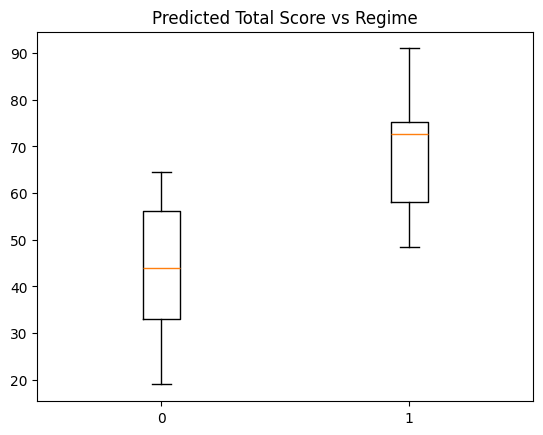

In [ ]:
specs = [0,1]
data = []
for spec in specs:
    vals = holdout[holdout['Aut(0)/Dem(1)'] == spec]['Predicted Total Score']
    data.append(vals)
plt.boxplot(data)
plt.title('Predicted Total Score vs Regime')
plt.xticks([1,2],labels=specs)

In [ ]:
h_aut.describe()

,Predicted Total Score
count,50.000000
mean,43.180000
std,12.928674
min,19.000000
25%,33.125000
50%,44.000000
75%,56.125000
max,64.500000


In [ ]:
print('range for autocracies')
print('min_max:',h_aut.max()-h_aut.min() , 'std',h_aut.std(), 'min_25%:',h_aut.quantile(0.25)-h_aut.min(), '25%_75%:',h_aut.quantile(0.75)-h_aut.quantile(0.25),'75%_max:',h_aut.max()-h_aut.quantile(0.75))
print('range for democracies')
print('min_max:',h_dem.max()-h_dem.min() , 'std',h_dem.std(), 'min_25%:',h_dem.quantile(0.25)-h_dem.min(), '25%_75%:',h_dem.quantile(0.75)-h_dem.quantile(0.25),'75%_max:',h_dem.max()-h_dem.quantile(0.75))

range for autocracies
min_max: 45.5 std 12.928674032742029 min_25%: 14.125 25%_75%: 23.0 75%_max: 8.375
range for democracies
min_max: 42.5 std 12.583530430496765 min_25%: 9.5 25%_75%: 17.25 75%_max: 15.75


In [ ]:
# As we can see both classes have similar min_max_range and similar variancies (and standard deviations).
# Thus it does not seem that there is more variation of total score between autocracies than between democracies.

In [ ]:
# However, as we can observe from the respective boxplots and quantiles:
# In the 0%_25% quantiles range: there is much more variation within autocracies than within democracies.
# In the 25%-75% quantiles range: there is more variation within autocracies than within democracies.
# In the 75%_100% quantiles range: there is much less variation within autocracies than within democracies.


# Part 4. Clustering  (25 points)

With VDEM_subset, and using the five high level democracy indices as well as the five Internet Freedom measures, you should now perform a hierarchical clustering of the countries.

- apply a min-max scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
unscaled_data = VDEM_subset[['v2x_polyarchy','v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem','v2smgovdom_osp', 'v2smgovfilprc_osp','v2smgovsmcenprc_osp', 'v2smonper_osp', 'v2smarrest_osp']]
scaler.fit(unscaled_data)
print(scaler.data_min_)
print(scaler.data_max_)
scaled_data = scaler.transform(unscaled_data)
scaled_data_columns = ['R_polyarchy','R_libdem', 'R_partipdem', 'R_delibdem', 'R_egaldem','R_govdom_osp', 'R_govfilprc_osp','R_govsmcenprc_osp', 'R_onper_osp', 'R_arrest_osp']
scaled_data_pd = pd.DataFrame(scaled_data, columns=scaled_data_columns)
scaled_data_pd
VDEM_subset_rescaled = pd.concat([VDEM_subset,scaled_data_pd], axis=1)
VDEM_subset_rescaled

[0.023 0.04  0.019 0.026 0.069 0.233 0.246 1.531 0.194 0.21 ]
[0.892 0.84  0.673 0.808 0.807 3.822 3.882 3.963 3.81  2.911]


,Total Score,Status,country_name,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_regime,...,R_polyarchy,R_libdem,R_partipdem,R_delibdem,R_egaldem,R_govdom_osp,R_govfilprc_osp,R_govsmcenprc_osp,R_onper_osp,R_arrest_osp
0,64,Partly Free,Angola,2019,0.386,0.230,0.105,0.260,0.148,1.0,...,0.417722,0.23750,0.131498,0.299233,0.107046,0.615213,0.748900,0.983964,0.743639,0.660866
1,72,Free,Argentina,2019,0.812,0.631,0.527,0.635,0.592,2.0,...,0.907940,0.73875,0.776758,0.778772,0.708672,0.865701,0.990374,0.986431,0.864768,0.886709
2,76,Free,Armenia,2019,0.805,0.641,0.532,0.706,0.656,1.0,...,0.899885,0.75125,0.784404,0.869565,0.795393,0.750348,0.953795,0.980263,0.857024,0.845243
3,77,Free,Australia,2019,0.838,0.789,0.602,0.737,0.706,3.0,...,0.937860,0.93625,0.891437,0.909207,0.863144,0.736974,0.985424,0.964227,0.858960,0.915957
4,39,Not Free,Azerbaijan,2019,0.206,0.070,0.072,0.047,0.118,1.0,...,0.210587,0.03750,0.081040,0.026854,0.066396,0.042073,0.270902,0.469161,0.377212,0.209922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,26,Not Free,Uzbekistan,2019,0.209,0.088,0.064,0.190,0.147,0.0,...,0.214039,0.06000,0.068807,0.209719,0.105691,0.240736,0.363036,0.239720,0.478429,0.299519
61,30,Not Free,Venezuela,2019,0.229,0.086,0.152,0.052,0.134,1.0,...,0.237054,0.05750,0.203364,0.033248,0.088076,0.000000,0.223872,0.540296,0.413717,0.403554
62,24,Not Free,Vietnam,2019,0.217,0.122,0.194,0.162,0.202,0.0,...,0.223245,0.10250,0.267584,0.173913,0.180217,0.328504,0.302805,0.277549,0.343750,0.114402
63,58,Partly Free,Zambia,2019,0.372,0.274,0.248,0.253,0.244,1.0,...,0.401611,0.29250,0.350153,0.290281,0.237127,0.559766,0.496975,0.827303,0.858131,0.237320


- use *centroid linkage* and *Euclidean distance*.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(VDEM_subset_rescaled[scaled_data_columns], method='centroid', metric='euclidean')

1. Plot the *dendrogram* with a *color threshold* = 0.8
    - how many clusters can you visually recognize?

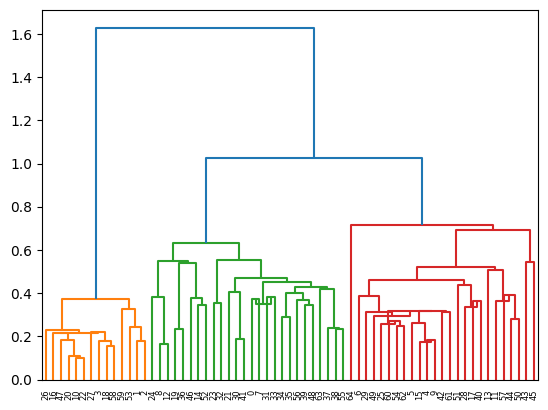

In [ ]:
dendrogram(Z, color_threshold=0.8)
plt.show()

In [ ]:
# Visually we recognize either 2 clusters(blue) or 3 clusters[yellow,green,red]

2. Now, you should exploit the silhouette score (as an evaluation metric) in order to find the best number of flat clusters:
    - your candidate numbers are 2 to 7.
    - for each number, find the flat clusters, and calculate the silhouette score.
    - choose the number of clusters that maximizes the silhouette score.

(remember to redo the clustering with the ideal number of clusters)

With the **best** clustering you got, store the clusters as a new column `cluster` in the dataframe.

In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics
for i in range(2,8):
  clusters = fcluster(Z, i, criterion='maxclust')
  print('number of clusters:',i,' ','silhouette_score:', metrics.silhouette_score(VDEM_subset_rescaled[scaled_data_columns], clusters))
  print('flat clusters:',clusters)
  print(" ")

number of clusters: 2   silhouette_score: 0.4809372499779575
flat clusters: [2 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 1 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2]
 
number of clusters: 3   silhouette_score: 0.43713781195215634
flat clusters: [2 1 1 1 3 3 3 2 2 3 1 3 2 3 2 3 1 3 1 2 1 2 1 2 2 3 1 1 3 3 2 2 2 2 2 2 2
 2 2 2 3 2 3 3 3 3 2 1 2 3 3 3 2 1 3 2 2 3 1 1 3 3 3 2 3]
 
number of clusters: 4   silhouette_score: 0.303744478074317
flat clusters: [2 1 1 1 3 3 3 2 2 3 1 3 2 3 2 3 1 3 1 2 1 2 1 2 2 3 1 1 3 3 2 2 2 2 2 2 2
 2 2 2 3 2 3 3 3 3 2 1 2 3 3 3 2 1 3 2 2 3 1 1 3 3 3 2 4]
 
number of clusters: 5   silhouette_score: 0.29002005169239986
flat clusters: [2 1 1 1 3 3 3 2 2 3 1 3 2 3 2 3 1 3 1 2 1 2 1 2 2 3 1 1 3 3 2 2 2 2 2 2 2
 2 2 2 3 2 3 4 3 4 2 1 2 3 3 3 2 1 3 2 2 3 1 1 3 3 3 2 5]
 
number of clusters: 6   silhouette_score: 0.2780705078254252
flat clusters: [3 1 1 1 4 4 4 3 2 4 1 4 2 4 2 4 1 4 1 2 1 3 1 3 2 4 1 1 4 4 3 3 3 3 3 3 2
 3 3

In [ ]:
# the number of clusters that maximizes the silhouette score(closest to 1) is 2.
clusters = fcluster(Z, 2, criterion='maxclust')
VDEM_subset_rescaled['cluster'] = clusters
VDEM_subset_rescaled

,Total Score,Status,country_name,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_regime,...,R_libdem,R_partipdem,R_delibdem,R_egaldem,R_govdom_osp,R_govfilprc_osp,R_govsmcenprc_osp,R_onper_osp,R_arrest_osp,cluster
0,64,Partly Free,Angola,2019,0.386,0.230,0.105,0.260,0.148,1.0,...,0.23750,0.131498,0.299233,0.107046,0.615213,0.748900,0.983964,0.743639,0.660866,2
1,72,Free,Argentina,2019,0.812,0.631,0.527,0.635,0.592,2.0,...,0.73875,0.776758,0.778772,0.708672,0.865701,0.990374,0.986431,0.864768,0.886709,1
2,76,Free,Armenia,2019,0.805,0.641,0.532,0.706,0.656,1.0,...,0.75125,0.784404,0.869565,0.795393,0.750348,0.953795,0.980263,0.857024,0.845243,1
3,77,Free,Australia,2019,0.838,0.789,0.602,0.737,0.706,3.0,...,0.93625,0.891437,0.909207,0.863144,0.736974,0.985424,0.964227,0.858960,0.915957,1
4,39,Not Free,Azerbaijan,2019,0.206,0.070,0.072,0.047,0.118,1.0,...,0.03750,0.081040,0.026854,0.066396,0.042073,0.270902,0.469161,0.377212,0.209922,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,26,Not Free,Uzbekistan,2019,0.209,0.088,0.064,0.190,0.147,0.0,...,0.06000,0.068807,0.209719,0.105691,0.240736,0.363036,0.239720,0.478429,0.299519,2
61,30,Not Free,Venezuela,2019,0.229,0.086,0.152,0.052,0.134,1.0,...,0.05750,0.203364,0.033248,0.088076,0.000000,0.223872,0.540296,0.413717,0.403554,2
62,24,Not Free,Vietnam,2019,0.217,0.122,0.194,0.162,0.202,0.0,...,0.10250,0.267584,0.173913,0.180217,0.328504,0.302805,0.277549,0.343750,0.114402,2
63,58,Partly Free,Zambia,2019,0.372,0.274,0.248,0.253,0.244,1.0,...,0.29250,0.350153,0.290281,0.237127,0.559766,0.496975,0.827303,0.858131,0.237320,2


 3. Finally, you should compare the clusters with other variables: Status and regime.
  

In [ ]:
VDEM_subset_rescaled[['Status','v2x_regime','cluster']]

,Status,v2x_regime,cluster
0,Partly Free,1.0,2
1,Free,2.0,1
2,Free,1.0,1
3,Free,3.0,1
4,Not Free,1.0,2
...,...,...,...
60,Not Free,0.0,2
61,Not Free,1.0,2
62,Not Free,0.0,2
63,Partly Free,1.0,2


  - First, use the `Status` as a ground truth:
    - make a contingency table with `cluster`, and
    - find the homogeneity and completeness scores

In [ ]:
print('homogeneity_score_Status:',metrics.homogeneity_score(VDEM_subset_rescaled['Status'],VDEM_subset_rescaled['cluster']))
print('completeness_score_Status:',metrics.completeness_score(VDEM_subset_rescaled['Status'],VDEM_subset_rescaled['cluster']))
pd.crosstab(index=VDEM_subset_rescaled['cluster'], columns=VDEM_subset_rescaled['Status']).reindex(columns=['Not Free','Partly Free','Free'])

homogeneity_score_Status: 0.2760324769609475
completeness_score_Status: 0.5634545691253982


Status,Not Free,Partly Free,Free
cluster,,,
1,0,2,12
2,21,27,3


- Second, use the `v2x_regime` as a ground truth:
    - make a contingency table with `cluster`, and
    - find the homogeneity and completeness scores


In [ ]:
print('homogeneity_score_regime:',metrics.homogeneity_score(VDEM_subset_rescaled['v2x_regime'],VDEM_subset_rescaled['cluster']))
print('completeness_score_regime:',metrics.completeness_score(VDEM_subset_rescaled['v2x_regime'],VDEM_subset_rescaled['cluster']))
pd.crosstab(index=VDEM_subset_rescaled['cluster'], columns=VDEM_subset_rescaled['v2x_regime'])

homogeneity_score_regime: 0.2865184890572893
completeness_score_regime: 0.7118998488466165


v2x_regime,0.0,1.0,2.0,3.0
cluster,,,,
1,0,1,2,11
2,13,28,10,0


- Are the clusters more **homogeneous** with respect to the status or the regime?
- Are the clusters more **complete** with respect to the status or the regime?

In [ ]:
# The homogeneity  is quit esmall for both 'truth criteria' as the number of clusters does no much the number of their classes.
# The 2 clusters are slightly more homogenous with respect to the regime.
#
# The situation is improved with respect to the completeness of the 2-clusters-model(for both 'truth criteria').
# The 2 clusters are significantly more complete with respect to the regime.